<a href="https://colab.research.google.com/github/Wizard1003/localrepo/blob/main/Energy_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d akhiljethwa/world-energy-statistics
!unzip world-energy-statistics.zip

Saving Consumption_Coal.csv to Consumption_Coal (2).csv
Saving Consumption_NaturalGas.csv to Consumption_NaturalGas (1).csv
Saving Consumption_Neuclear+renewables.csv to Consumption_Neuclear+renewables (1).csv
Saving Consumption_Petroleum.csv to Consumption_Petroleum (1).csv
Saving Consumption_Total.csv to Consumption_Total (1).csv
Saving Production_Coal.csv to Production_Coal.csv
Saving Production_NaturalGas.csv to Production_NaturalGas.csv
Saving Production_Nuclear+renewables.csv to Production_Nuclear+renewables.csv
Saving Production_Pertroleum.csv to Production_Pertroleum.csv
Saving Production_Total.csv to Production_Total.csv
Saving World Energy Overview.csv to World Energy Overview (1).csv
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/akhiljethwa/world-energy-statistics
License(s): CC0-1.0
world-energy-statistics.zip: Skipping, found more recently mod

In [4]:
import pandas as pd
df = pd.read_csv('Consumption_Data/Consumption_Total.csv')
df_p = pd.read_csv('Production_Data/Production_Total.csv')
df['2021'] = pd.to_numeric(df['2021'], errors='coerce')
df_p['2021'] = pd.to_numeric(df_p['2021'], errors='coerce')


In [5]:
Consumption_2021 = df[['Continent', 'Country', '2021']]

Consumption_2021['2021'] = pd.to_numeric(Consumption_2021['2021'], errors='coerce').fillna(0)
Aggregare_of_energy_consumption_2021 = Consumption_2021.groupby('Continent').sum().reset_index()

total_energy_2021 = Aggregare_of_energy_consumption_2021['2021'].sum()

Aggregare_of_energy_consumption_2021['Percentage'] = (Aggregare_of_energy_consumption_2021['2021'] / total_energy_2021) * 100



<ipython-input-5-a8fc575d6d8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Consumption_2021['2021'] = pd.to_numeric(Consumption_2021['2021'], errors='coerce').fillna(0)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(12, 8))
bars = plt.bar(Aggregare_of_energy_consumption_2021['Continent'], Aggregare_of_energy_consumption_2021['Percentage'], color=sns.color_palette("BrBG", len(Aggregare_of_energy_consumption_2021)))
plt.xlabel('Continent', fontsize=14, fontweight='bold', fontname = 'monospace')
plt.ylabel('% of Energy Consumption in 2021', fontsize=14, fontweight='bold', fontname = 'monospace')
plt.title('Energy Consumption by each Continent in 2021', fontsize=16, fontweight='bold', fontname = 'monospace')


plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
# Show the plot
plt.xticks(rotation=45, fontsize=10,fontname = 'monospace' )
plt.yticks(fontsize=10,fontname = 'monospace' )
plt.show()

OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
df_p['2021'] = pd.to_numeric(df_p['2021'], errors='coerce')
df_p = df_p.dropna(subset=['2021'])

Asian_consumption_data = df[df['Continent'] == 'Asia & Oceania'][['Country', '2021']]
Top_10_asia = Asian_consumption_data.sort_values(by='2021', ascending=False).head(10)
Total_energy_asia_consumed = Top_10_asia['2021'].sum()

Top_10_asia['Percentage'] = (Top_10_asia['2021'] / Total_energy_asia_consumed) * 100


<ipython-input-14-55404ad3af61>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


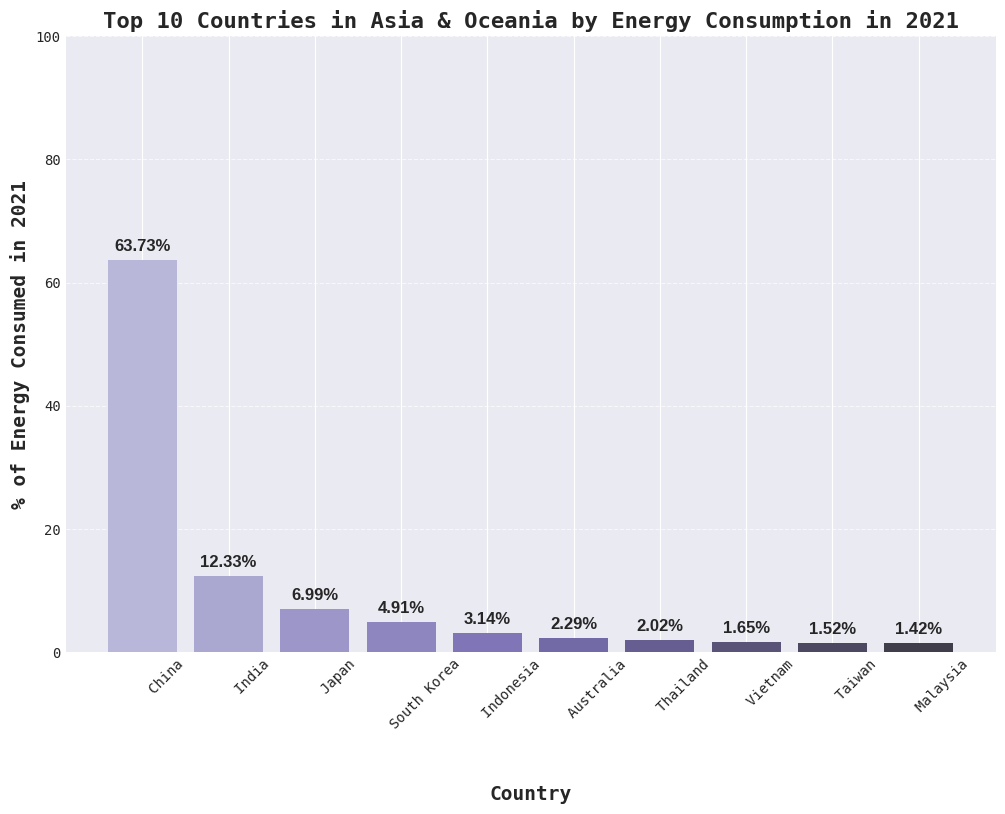

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn-darkgrid')


plt.figure(figsize=(12, 8))
bars = plt.bar(Top_10_asia['Country'], Top_10_asia['Percentage'], color=sns.color_palette("Purples_d", len(Top_10_asia)))

plt.xlabel('Country', fontsize=14, fontweight='bold', fontname='monospace')
plt.ylabel('% of Energy Consumed in 2021', fontsize=14, fontweight='bold',fontname='monospace')
plt.title('Top 10 Countries in Asia & Oceania by Energy Consumption in 2021', fontsize=16, fontweight='bold',fontname='monospace')


plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, fontsize=10,fontname='monospace')
plt.yticks(fontsize=10,fontname='monospace')
plt.show()